#Random forest titanic - example week 5 and 6

Import libraries

In [7]:
import pandas as pd
from sklearn.cluster import KMeans #The k-means algorithm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [8]:
df1 = pd.read_csv("gender_submission.csv")#sequence of one or more characters used to specify the boundary between separate, independent regions in plain text or other data streams.
print(df1)

df2 = pd.read_csv("test.csv")
print(df2)

df3 = pd.read_csv("train.csv")
print(df3)

df = pd.merge(df1, df2, df3)
#df = df[(df['trees'] > 10).any() & (df['trees'] < 20)]

df = df.fillna(0)

df.head(30)

#https://www.kaggle.com/code/zlatankr/titanic-random-forest-82-78 

FileNotFoundError: [Errno 2] No such file or directory: 'heart.csv'

In [6]:
# do not include "has hear disease", so the "target" column. Otherwise our model already knows if the person has a heart disease.

# Create independent variable
x = df.drop("target", axis = 1)
#x

# Create dependent variable
y = df["target"]
#y

NameError: name 'df' is not defined

In [4]:
# Make a test and train set
from sklearn.model_selection import train_test_split

# Create the sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1982)

# Show the sets
X_train.shape, X_test.shape

NameError: name 'x' is not defined

In [6]:
from sklearn.ensemble import RandomForestClassifier

# You can omit the random state here if you don't use it
# n_jobs = -1 means "use all process power of YOUR computer". But if your computer has four processors, then type n_jobs = 1
# max_depth = go down five levels and then stop
# n_estimators = make 100 trees and then decide
# oob_score = see how accurate your tree is
# All the juicy statistics are in this object: RandomForestClassifier
rfc = RandomForestClassifier(random_state=1982, n_jobs = -1, max_depth = 5, n_estimators = 100, oob_score = True)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True,
                       random_state=1982)

In [7]:
# How accurate are we?
rfc.oob_score_

0.9232914923291492

Make a confusion matrix:

In [8]:
from sklearn.metrics import confusion_matrix
y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, index=["No disease (actual", "disease (actual)"], columns = ["No disease (pred)", "Disease (pred)"])
cm

,No disease (pred),Disease (pred)
No disease (actual,126,16
disease (actual),14,152


[Text(0.5369318181818182, 0.9166666666666666, 'ca <= 0.5\ngini = 0.5\nsamples = 453\nvalue = [360, 357]\nclass = Disease'),
 Text(0.3068181818181818, 0.75, 'oldpeak <= 2.45\ngini = 0.379\nsamples = 252\nvalue = [102, 299]\nclass = No disease'),
 Text(0.18181818181818182, 0.5833333333333334, 'oldpeak <= 0.75\ngini = 0.325\nsamples = 226\nvalue = [74, 288]\nclass = No disease'),
 Text(0.09090909090909091, 0.4166666666666667, 'trestbps <= 147.0\ngini = 0.225\nsamples = 141\nvalue = [28, 189]\nclass = No disease'),
 Text(0.045454545454545456, 0.25, 'exang <= 0.5\ngini = 0.144\nsamples = 124\nvalue = [15, 177]\nclass = No disease'),
 Text(0.022727272727272728, 0.08333333333333333, 'gini = 0.093\nsamples = 106\nvalue = [8, 155]\nclass = No disease'),
 Text(0.06818181818181818, 0.08333333333333333, 'gini = 0.366\nsamples = 18\nvalue = [7, 22]\nclass = No disease'),
 Text(0.13636363636363635, 0.25, 'cp <= 0.5\ngini = 0.499\nsamples = 17\nvalue = [13, 12]\nclass = Disease'),
 Text(0.11363636363

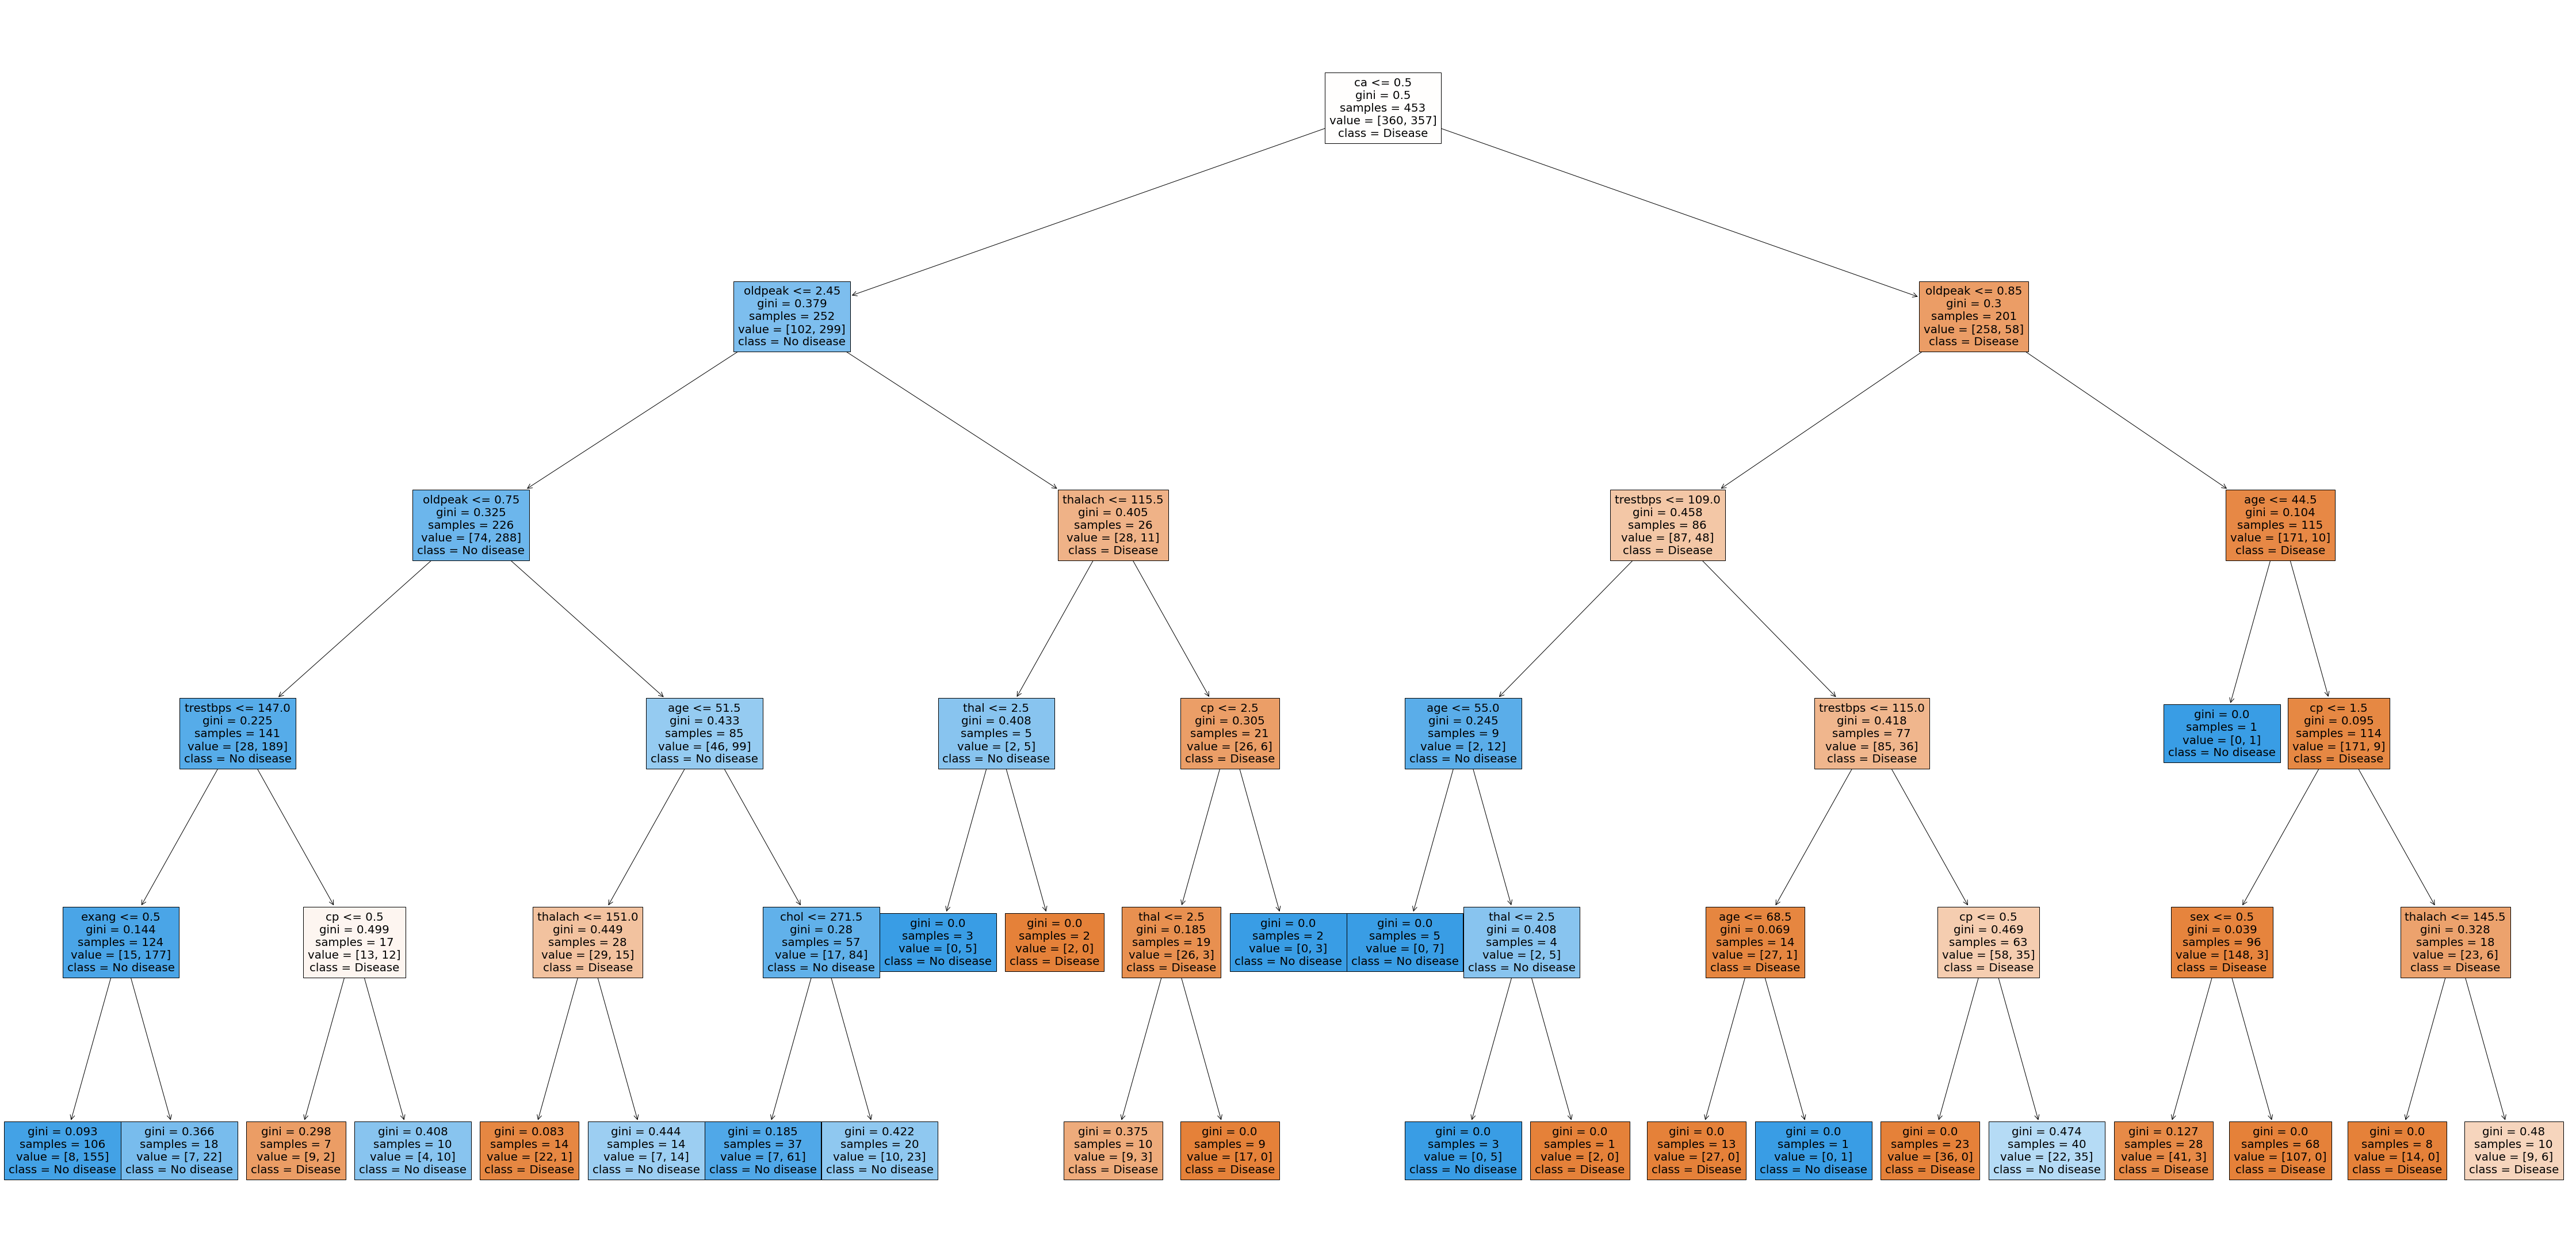

In [9]:
from sklearn.tree import plot_tree
plt.figure(figsize = (80,40))

# Change the [5] to see other trees (we made 100)
plot_tree(rfc.estimators_[5], feature_names = x.columns, class_names = ["Disease", "No disease"], filled=True)


Test model on a "new" person:

In [10]:
p = list(df.iloc[1020].drop("target"))
#p
rfc.predict([p])

c:\Users\jvanw\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)